Practica 2: Implementación del Perceptrón Multicapa desde Cero
Redes Neuronales y Aprendizaje Profundo
Rodrigo F. Román Godínez
Flores Lara Alberto
5BV1

1. Introducción
En esta práctica de laboratorio implementaremos el modelo del Perceptrón, un concepto
fundamental en el campo de las redes neuronales. Utilizaremos el Perceptrón para
resolver un problema clásico de clasificación, como la simulación de una compuerta
lógica (AND y OR), y exploraremos cómo aprende a través de su regla de aprendizaje.

2. Objetivos
El objetivo de esta práctica es implementar un Perceptrón Multicapa (MLP) desde cero y
entrenarlo para resolver tres problemas clásicos:
* Problema XOR: Resolver un problema de clasificación no linealmente separable.
* Clasificación con Iris Dataset: Identificar las diferentes especies de flores en el
conjunto de datos Iris.
* MLP como Aproximador de Funciones: Utilizar el MLP para aproximar una función
matemática no lineal.

3. Conceptos Clave
Perceptrón Multicapa (MLP)
El MLP es una red neuronal de alimentación hacia adelante (feedforward) con una o más
capas ocultas entre la capa de entrada y la capa de salida. Cada capa está compuesta por
neuronas o nodos que están conectados a las neuronas de la capa anterior y la siguiente.
* Capa de entrada: Recibe los valores de las características del conjunto de datos
(por ejemplo, características del conjunto Iris como largo del pétalo y sépalo).
* Capas ocultas: Transforman las entradas mediante funciones de activación no
lineales, permitiendo que la red aprenda relaciones no lineales en los datos.
* Capa de salida: Produce la salida final de la red, que puede ser un valor continuo o
una clasificación.
* Función de Activación: Las funciones de activación introducen no linealidad en el MLP, permitiendo que la red
aprenda relaciones no lineales. Algunas de las funciones de activación más comunes son:

* Función Sigmoide: Convierte el valor de la neurona en un número entre 0 y 1. Se
utiliza comúnmente en la salida de la red para problemas de clasificación binaria.
Problema de XOR
El problema de XOR (o exclusivo O) es un problema lógico clásico que no puede ser
resuelto por un perceptrón simple, ya que los datos no son linealmente separables. Este
problema demuestra la necesidad de un MLP con al menos una capa oculta.
* Entrada XOR: [(0,0), (0,1), (1,0), (1,1)]
* Salida esperada XOR: [0, 1, 1, 0]
Con una capa oculta, el MLP puede aprender una solución no lineal a este problema.
Teorema de Aproximación Universal
El Teorema de Aproximación Universal afirma que un MLP con al menos una capa oculta
y suficientes neuronas puede aproximar cualquier función continua. Este teorema justifica
la capacidad del MLP para resolver problemas complejos, como la clasificación de
múltiples clases en el Iris Dataset o la aproximación de una función no lineal.

4. Materiales Necesarios
* Entorno de programación (Python, Google Colab, Jupyter Notebook).
* Librerías de Python: NumPy, opcionalmente Matplotlib para visualización.
* No se utilizarán bibliotecas de alto nivel como TensorFlow o PyTorch para la
creación de la red neuronal. Implementaremos las operaciones básicas de las
redes neuronales.

5. Instrucciones Paso a Paso
Clase MLP
* Implementaremos el forward pass, retropropagación y entrenamiento para la red MLP.

In [450]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [451]:
#Definición de la clase MLP
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Inicialización de pesos y sesgos
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(1, hidden_size)
        self.bias2 = np.random.rand(1, output_size)
    
    # Función sigmoide
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    #Derivada de la función sigmoide
    def sigmoid_derivative(self, z):
        return z * (1 - z)
    
    #Paso hacia adelante
    def forward(self, x):
        self.layer1 = self.sigmoid(np.dot(x, self.weights1) + self.bias1)
        output = self.sigmoid(np.dot(self.layer1, self.weights2) + self.bias2)
        return output
    
    # Retropropagación del error
    def backward(self, x, y, output):
        # Calculo de los errores
        output_error = output - y
        output_delta = output_error * self.sigmoid_derivative(output)

        hidden_error = np.dot(output_delta, self.weights2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.layer1)

        # Actualización de pesos y sesgos
        self.weights2 -= np.dot(self.layer1.T, output_delta)
        self.weights1 -= np.dot(x.T, hidden_delta)
        self.bias2 -= np.sum(output_delta, axis=0)
        self.bias1 -= np.sum(hidden_delta, axis=0)
    
    # Función de entrenamiento
    def train(self, x, y, iterations):
        for _ in range(iterations):
            output = self.forward(x)
            self.backward(x, y, output)


Parte 1: Resolviendo el problema XOR

In [452]:
# Datos de entrada y salida del problema XOR
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Inicialización y entrenamiento del MLP
mlp = MLP(input_size=2, hidden_size=2, output_size=1)
mlp.train(x, y, 1000)

# Probando la red entrenada en las entradas XOR
Predicion = mlp.forward(x)
Predicion= np.round(Predicion)
print("Resultado del MLP para XOR:", Predicion)

# Evaluamos la precisión
print("Precisión: ", accuracy_score(y, Predicion))


Resultado del MLP para XOR: [[0.]
 [1.]
 [1.]
 [0.]]
Precisión:  1.0


Parte 2: Clasificación con el dataset Iris

In [453]:
# Cargamos los datos Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Etiquetas de clase (0, 1, 2)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definimos la función para convertir etiquetas en formato One-vs-All
def one_vs_all(y, class_label):
    return np.where(y == class_label, 1, 0)

#Creamo las etiquetas One-vs-All para cada clase
y_train_setosa = one_vs_all(y_train, 0).reshape(-1, 1)
y_train_versicolor = one_vs_all(y_train, 1).reshape(-1, 1)
y_train_virginica = one_vs_all(y_train, 2).reshape(-1, 1)


#Crearmos el MLP para cada clase
mlp_setosa = MLP(input_size=4, hidden_size=6, output_size=1)
mlp_versicolor = MLP(input_size=4, hidden_size=6, output_size=1)
mlp_virginica = MLP(input_size=4, hidden_size=6, output_size=1)

# Entrenamos los MLPs con los datos One-vs-All
mlp_setosa.train(X_train, y_train_setosa,1000)
mlp_versicolor.train(X_train, y_train_versicolor,1000)
mlp_virginica.train(X_train, y_train_virginica,1000)

# Obtenemos las predicciones de cada MLP
setosa_preds = mlp_setosa.forward(X_test)
versicolor_preds = mlp_versicolor.forward(X_test)
virginica_preds = mlp_virginica.forward(X_test)

#Redondeamos los datos de los MLPs a 0 y 1
setosa_preds = np.round(setosa_preds)
versicolor_preds= np.round(versicolor_preds)
virginica_preds= np.round(virginica_preds)

predicciones = np.column_stack((setosa_preds, versicolor_preds, virginica_preds))
predicciones_finales = np.argmax(predicciones, axis=1)

# Evaluamos la precisión
print("Precisión: ", accuracy_score(y_test, predicciones_finales))

Precisión:  0.4222222222222222


Parte 3: Aproximación de la función sin(x)

Epoch 1/500


c:\Users\albsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.4235 
Epoch 2/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.3623
Epoch 3/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.2832
Epoch 4/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.1964
Epoch 5/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.1397
Epoch 6/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.1165
Epoch 7/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.1121
Epoch 8/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.1162
Epoch 9/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.1382
Epoch 10/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.1076
Epoch 11/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.1085
Epoch 12/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 0.0964
Epoch 13/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.0964
Epoch 14/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.0862
Epoch 15/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step 

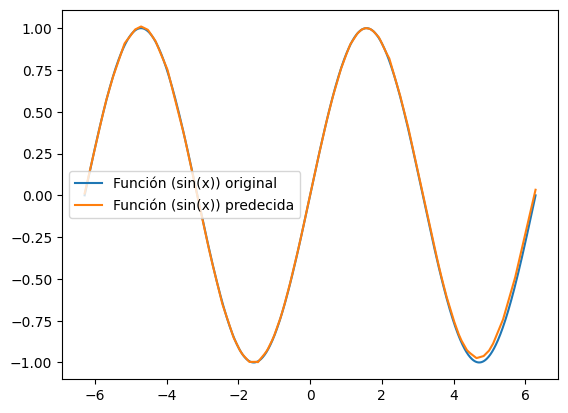

In [454]:
x_train = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y_train = np.sin(x_train)

model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.fit(x_train, y_train, epochs=500, verbose=1)

y_pred = model.predict(x_train)

plt.plot(x_train, y_train, label='Función (sin(x)) original')
plt.plot(x_train, y_pred, label='Función (sin(x)) predecida')
plt.legend()
plt.show()


